# Chapter 4: Training Models

Bab ini membahas cara kerja model Machine Learning dari dalam, dimulai dari model yang paling sederhana, yaitu **Linear Regression**, lalu menjelajahi teknik optimasi seperti **Gradient Descent**, dan akhirnya masuk ke topik lanjutan seperti **Regularization**, **Logistic Regression**, dan **Softmax Regression**.

---

## 📌 Linear Regression dengan Normal Equation

Linear Regression adalah model prediktif yang sangat sederhana. Model ini berusaha menemukan garis lurus terbaik yang dapat memetakan input `X` ke output `y` dengan rumus:

\[
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n
\]

Atau dalam bentuk vektorisasi:

\[
\hat{y} = \theta^T x
\]

Untuk menemukan parameter terbaik `θ`, kita minimalkan fungsi biaya Mean Squared Error (MSE):

\[
MSE(\theta) = \frac{1}{m} \sum_{i=1}^{m} (\theta^T x^{(i)} - y^{(i)})^2
\]

---

## ✅ Normal Equation

Untuk dataset kecil dan jumlah fitur terbatas, kita bisa menggunakan **Normal Equation** untuk langsung menghitung parameter `θ` tanpa iterasi:

\[
\theta = (X^T X)^{-1} X^T y
\]

Langkah-langkah:
1. Tambahkan fitur bias `x₀ = 1` ke setiap baris `X`.
2. Hitung hasil `theta_best` dengan rumus di atas.
3. Gunakan `theta_best` untuk membuat prediksi baru.

---

## 📊 Visualisasi

Plot yang dihasilkan menunjukkan:
- Titik biru adalah data latih yang dihasilkan secara acak.
- Garis merah adalah garis regresi hasil model yang telah dilatih.

---

## 🔎 Catatan Penting

- **Kelebihan**: Sederhana, cepat untuk dataset kecil.
- **Kekurangan**: Tidak efisien jika fitur sangat banyak (`XᵀX` bisa jadi tidak invertibel), dan tidak cocok untuk data nonlinier.

---

➡️ Selanjutnya: kita akan mempelajari **Gradient Descent**, metode optimasi iteratif yang lebih efisien untuk dataset besar dan jumlah fitur tinggi.


Theta hasil perhitungan: [[4.21509616]
 [2.77011339]]


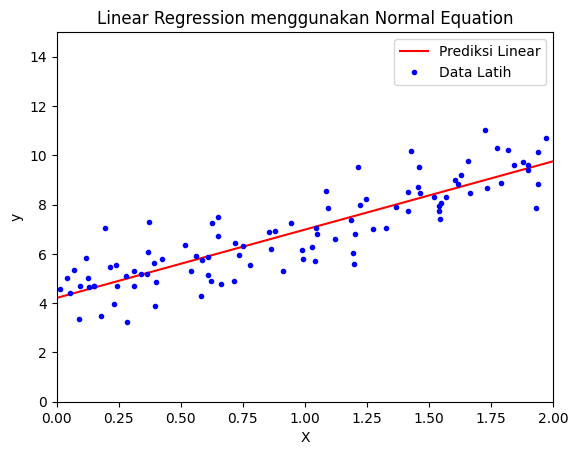

In [1]:
# Linear Regression menggunakan Normal Equation

import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate data linier acak
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Step 2: Tambahkan x0 = 1 ke setiap instance (bias trick)
X_b = np.c_[np.ones((100, 1)), X]  # bentuknya (100, 2)

# Step 3: Hitung theta optimal menggunakan Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Output parameter theta (intercept dan slope)
print("Theta hasil perhitungan:", theta_best)

# Step 4: Prediksi menggunakan model
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # tambahkan x0 = 1
y_predict = X_new_b.dot(theta_best)

# Step 5: Visualisasi prediksi
plt.plot(X_new, y_predict, "r-", label="Prediksi Linear")
plt.plot(X, y, "b.", label="Data Latih")
plt.axis([0, 2, 0, 15])
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression menggunakan Normal Equation")
plt.legend()
plt.show()
